# Tasca S8.01. Visualitzacions en Python

Aquesta pràctica permetrà explorar com es poden utilitzar eines de visualització avançades en Python per a interpretar i presentar dades de manera efectiva, proporcionant una oportunitat valuosa per a millorar les habilitats analítiques i tècniques.

## Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Primero tengo que descargarme la libreria mysql-connector-python para poder conectar Python con MySQL.
Ultilizaremos el comando "pip install mysql-connector-python" en la terminal de Windows (Tecla windows+R y ponemos codigo 'cmd')

Tenemos que descargarnos el resto de librerias necesarias para crear DataFrames (df), modificar, hacer graficos, todo lo necesario para el resto de ejercicios.
Para eso utilizaremos los siguientes comandos en la terminal de Windows:
pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn

Vamos a importar esas librerias para poder utilizarlas en nuestro programario

In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns

Ahora vamos a realizar la conexion, crear los df de las tablas de la base de datos, renombramos las tablas y las mostramos

In [2]:
import mysql.connector
from mysql.connector import Error
try:
    connection = mysql.connector.connect(host='localhost',
                                        database='transactionsbd',
                                        username='root',
                                        password='toor')
    if connection.is_connected():
        cursor = connection.cursor() #Creación de un cursor para ejecutar consultas SQL
        cursor.execute(f"SHOW TABLES") # Se ejecuta la consulta "Show Tables" que devuelve las tablas de la base de datos
        tablas = [tabla[0] for tabla in cursor.fetchall()] # Se almacena la lista de nombres de las tablas en la variable tablas
       
        
        for tabla in tablas:  
            cursor.execute(f"SELECT * FROM {tabla}") # Ejecuta la consulta "Select * From {tabla}" para extraer los datos de c/tabla
            columnas = [columna[0] for columna in cursor.description] # Obtención de lista de nombres de las columnas de la tabla 
            globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)#Creación y nombramiento dinamico de pd.df
            print(f'df_{tabla}')

except Error as e:
    print("Error while connecting to MySQL", e) #Manejo de los posibles errores de sesión
finally:
    if connection.is_connected():
        cursor.close() # método para cerrar las conexiones abiertas después de que finalice su trabajo.
        connection.close() # método para cerrar las conexiones abiertas después de que finalice su trabajo.
        print("MySQL connection is closed")#Mensaje que el cursor y la conexión están cerradas  

df_companies
df_credit_card_status
df_credit_cards
df_products
df_transaction_products
df_transactions
df_users
MySQL connection is closed


Vamos a comprobar la info de los df

In [3]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [4]:
df_credit_card_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  275 non-null    object
 1   status   275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


In [6]:
df_credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    int64 
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    object
 5   cvv            275 non-null    object
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: int64(1), object(8)
memory usage: 19.5+ KB


In [7]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    int64 
 1   product_name  100 non-null    object
 2   price         100 non-null    object
 3   colour        100 non-null    object
 4   weight        100 non-null    object
 5   warehouse_id  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [8]:
df_transaction_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


In [9]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    object        
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 46.0+ KB


In [10]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    int64 
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB


Veo que algunos datos los clasifica mal. Los voy a rectificar

In [5]:
df_credit_cards['expiring_date'] = pd.to_datetime(df_credit_cards['expiring_date'], format='%m/%d/%Y', errors='coerce')
df_products['price'] = df_products['price'].replace({r'\$': ''}, regex=True).astype(float)  # Usar r'\$'
df_products['weight'] = df_products['weight'].astype(float)
df_transactions = df_transactions.astype({'amount': float})
df_transactions['declined'] = df_transactions['declined'].astype(bool)
df_users['birth_date'] = pd.to_datetime(df_users['birth_date'], errors='coerce')

Vamos a comprobar quelos tipos esten cambiados

In [6]:
df_credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             275 non-null    object        
 1   user_id        275 non-null    int64         
 2   iban           275 non-null    object        
 3   pan            275 non-null    object        
 4   pin            275 non-null    object        
 5   cvv            275 non-null    object        
 6   track1         275 non-null    object        
 7   track2         275 non-null    object        
 8   expiring_date  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 19.5+ KB


In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [14]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    bool          
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 42.0+ KB


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    int64         
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 21.6+ KB


Vamos a visualizar algunos datos de algunas tablas

Los 5 primeros datos de la tabla transactions

In [18]:
df_transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,False,"71, 1, 19",92,81.9184589824,-12.5275561984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,False,"47, 97, 43",170,-43.9694885888,-117.5251835904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,False,"47, 67, 31, 5",275,-81.222680576,-129.049879552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,False,"89, 83, 79",265,-34.3593055232,-100.555928064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,False,"43, 31",92,33.7381445632,158.298210304


los 5 ultimos de la tabla users

In [16]:
df_users.tail()

,id,name,surname,phone,email,birth_date,country,city,postal_code,address
270,271,Leandra,Cherry,089-285-7016,lobortis.quis@hotmail.ca,1991-09-02,Canada,Gander,H6S 6M9,554-9293 Sollicitudin Av.
271,272,Hedwig,Gilbert,064-204-8788,sem.eget@icloud.edu,1991-04-16,Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road"
272,273,Hilary,Ferguson,060-710-1604,sapien.molestie.orci@google.edu,1981-11-03,Canada,Pangnirtung,12T 5G4,Ap #736-4628 Cras St.
273,274,Jameson,Hunt,024-732-2321,fringilla@protonmail.com,1982-01-29,Canada,Township of Minden Hills,B6V 6N4,224-4927 Praesent Ave
274,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.


Vamos a continuar con los ejercicios

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

### Exercici 1

Una variable numèrica.

Se utiliza el campo 'amount' de la tabla 'transactions'

- Se ha escogido graficar un sencillo histograma que muestra la frecuncia de los montos de las transacciones y para ello primero se han filtrado las transacciones no rechazadas --> declines = 0 
- Luego solo se extrae la columna que nos interesa del DataFrame, es decir 'amount'.
- Se crea el histograma con Seaborn.

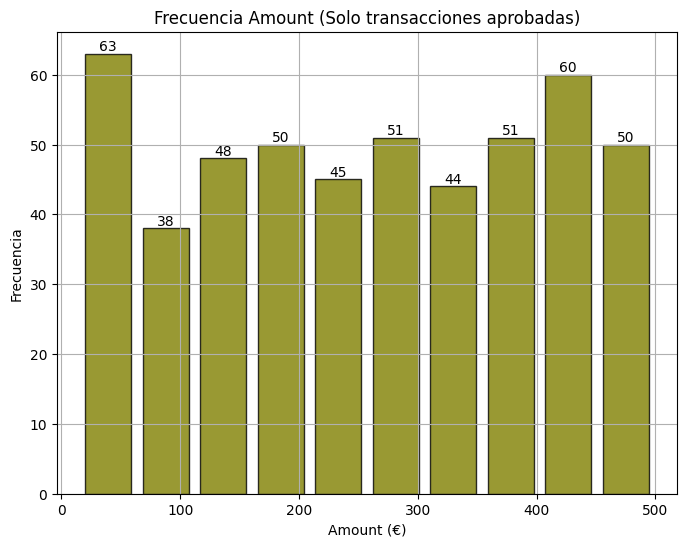

In [7]:
# Filtrar los datos donde 'declined' sea igual a 0
df_filtered = df_transactions[df_transactions['declined'] == 0]

# Crear el histograma con los datos filtrados
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_filtered['amount'], bins=10, color="olive", edgecolor="black", alpha=0.8, rwidth=0.8)

# Configurar el gráfico
plt.grid()
plt.title('Frecuencia Amount (Solo transacciones aprobadas)')
plt.ylabel('Frecuencia')
plt.xlabel('Amount (€)')

# Agregar etiquetas en las barras
for i in range(len(patches)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], str(int(n[i])), 
             ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

Para poder hacer una mejor analisis, vamos a obtener las estadisticas descriptivas del amount sin las transacciones declinadas

In [8]:
# Filtrar solo las transacciones aprobadas
df_filtered = df_transactions[df_transactions['declined'] == 0]

# Obtener estadísticas descriptivas de 'amount'
df_filtered['amount'].describe()

count    500.00000
mean     259.01118
std      143.13700
min       15.05000
25%      136.19250
50%      262.47000
75%      390.84750
max      499.23000
Name: amount, dtype: float64

##### analisis

Hemos utilizado el comando .decribe() para poder tener una vision mas amplia de los datos del grafico. Con esto obtenemos datos relevantes como la media, el max y el min.

No vemos grandes diferencias entre las columnas. La mayor frecuencia esta en los productos mas economicos. Estos podria ser que sean productos asociados a compras recurrentes o de menor costo, con alta frecuencia de ocurrencia.

La segunda columna con mayor frecuencia son ya productos mas caros, de entre 400€ y 450€ que podrían estar asociadas a la adquisición de productos premium, dirigidos a un público más selecto.

En general, los productos mas caros se venden con una buena frecuencia en nuestra empresa. Estos productos suelen tener un muy buen margen, superior a los productos mas baratos. Deberiamos promocionar estos productos ya que tienen una muy buena aceptacion entre nuestros clientes.

### Exercici 2

Dues variables numeriques

Voy a ver si existe una relacion entre el precio y el peso de nuestros productos. Como ya sabemos que mayor peso lleva a un mayor costo en el envio, queremos saber como afecta al precio del producto ese envio.

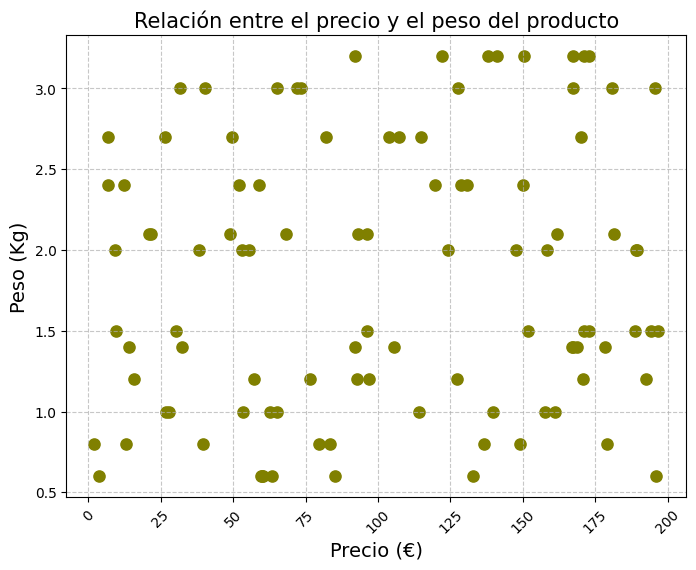

In [9]:
# Extraer datos
price = df_products['price']
weight = df_products['weight']

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x=price, y=weight, color='olive', s=65) 

# Etiquetas de los ejes y título
plt.xlabel('Precio (€)', fontsize=14)    
plt.ylabel('Peso (Kg)', fontsize=14)     
plt.title("Relación entre el precio y el peso del producto", fontsize=15)   

# Mostrar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(rotation=45, ha='center')

# Mostrar gráfico
plt.show()

##### analisis

La gráfica sugiere que no existe una relación clara entre el precio y el peso del producto, pues los puntos están esparcidos de manera casi perfecta a lo largo de la gráfica. Podemos concluir que por ser mas pesados no son mas caros.

Me preocupan los productos que son mas economicos pero tienen un peso mas elevado. Como ya sabemos que mayor peso mayor costo de envio, estaria bien hacer una repaso a los productos comprendidos en el cuadrante formado por 2.0 de peso y 100 € de precio por si esta bien reflejado el costo del envio.

### Exercici 3

Una variable categòrica

Se crea un grafico de barras para saber cuantas empresas tenemos por pais.

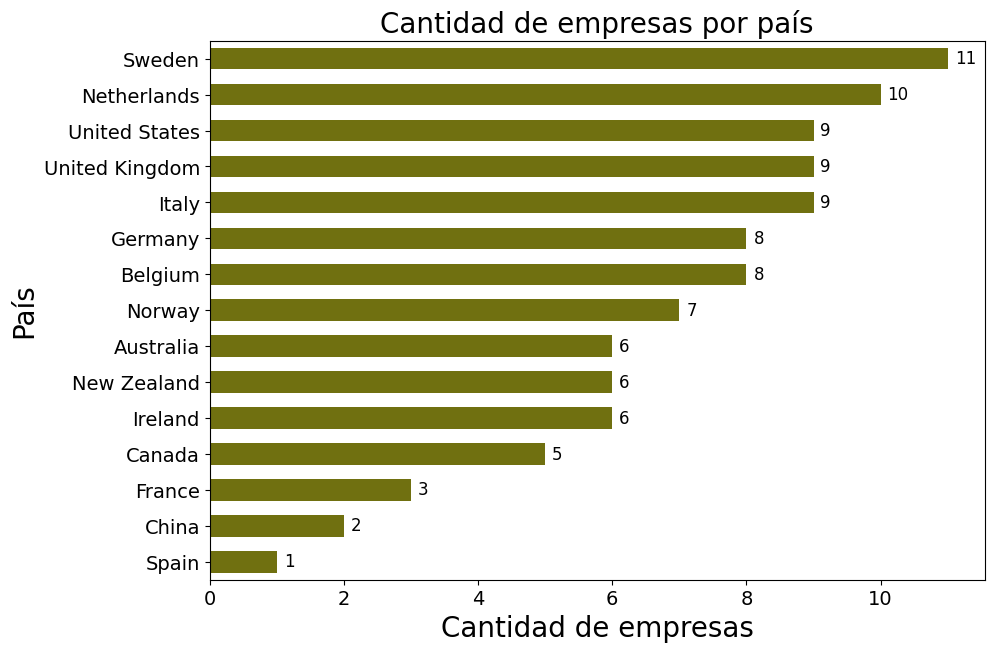

In [10]:
# Guardar la lista de países en orden descendente según la cantidad de empresas
orden_country = df_companies['country'].value_counts().index

# Crear la figura
plt.figure(figsize=(10, 7))  

# Generar el gráfico de barras con un solo color
ax = sns.countplot(y='country', data=df_companies, order=orden_country, color='olive', width=0.6)   

# Etiquetas de los ejes y título
plt.xlabel('Cantidad de empresas', fontsize=20)
plt.ylabel('País', fontsize=20)
plt.title('Cantidad de empresas por país', fontsize=20)

# Ajustar tamaño de las etiquetas en los ejes
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

# Agregar etiquetas con valores en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, padding=5)

# Mostrar el gráfico
plt.show()

##### analisis

Podemos hacer estrategias de expansion a partir de esta grafica. Asi sabemos en que paises estamos bien posicionados, en que paises tendriamos que hacer mas actuaciones de marqueting. Tendriamos que hacer campañas en el sur de Europa y en Asia, y tener en cuenta que no tenemos ningun pais de Sudamerica y Africa. Tendriamos que hacer algun estudio de mercado para saber si es economicamente viable intentar introducirnos en esos territorios.

### Exercici 4

Una variable categòrica i una numèrica

Primero creamos un nuevo df para poder juntar paises con el total amount de cada uno, descartando las operaciones declinadas. Para ello tenemos que juntar dos tablas con el operador .merge(). Las tablas son df_transaction y df_companies.

In [11]:
# Filtrar solo las transacciones aprobadas (declined = 0)
df_transactions_approved = df_transactions[df_transactions["declined"] == 0]

# Unir las transacciones aprobadas con las compañías
df_transactions_companies = df_transactions_approved.merge(df_companies, left_on='business_id', right_on='company_id', how='outer')

# Agrupar por país y sumar los montos
df_transactions_companies_group = df_transactions_companies.groupby("country")["amount"].sum().sort_values(ascending=False).reset_index()

In [12]:
# Vemos las 5 primeras lineas del nuevo df
df_transactions_companies_group.head()

,country,amount
0,Germany,26888.55
1,United Kingdom,25274.38
2,Sweden,18813.45
3,Ireland,16006.22
4,Norway,15318.01


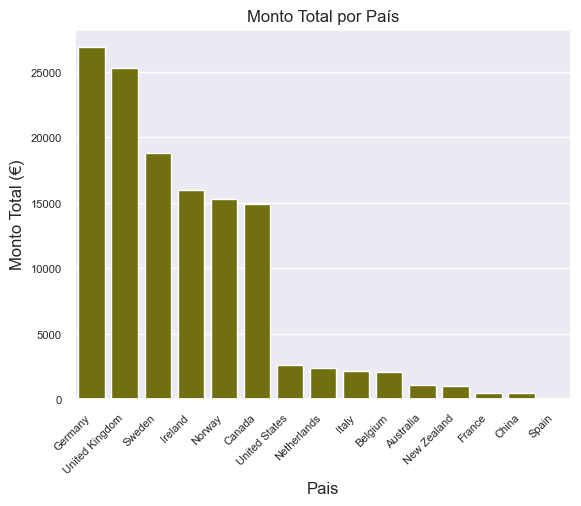

In [13]:
# Configurar el tema del gráfico
sns.set_theme(style='darkgrid')

# Crear el gráfico de barras
sns.barplot(  
    data=df_transactions_companies_group, x="country", y="amount", color="olive")

# Configuración del título y etiquetas
plt.title("Monto Total por País")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Pais", fontsize=12)
plt.ylabel("Monto Total (€)", fontsize=12)
plt.tick_params(axis='both', labelsize=8)

# Mostrar el gráfico
plt.show()

##### analisis

Con este grafico podemos saber en que paises facturamos mas y en que paises nuestra facturacion es baja. Esto nos permite implementar estratejias de marketing mejor dirijidas.

se podria plantear hacer un estudio de mercado en paises importantes donde la facturacion es baja, para conocer si la aceptacion de nuestros productos es buena, antes de realizar estratejias de marketing mas agresivas

### Exercici 5

Dues variables categòriques

Voy a mostrar la relacion entre las operaciones aceptadas y rechazadas por pais

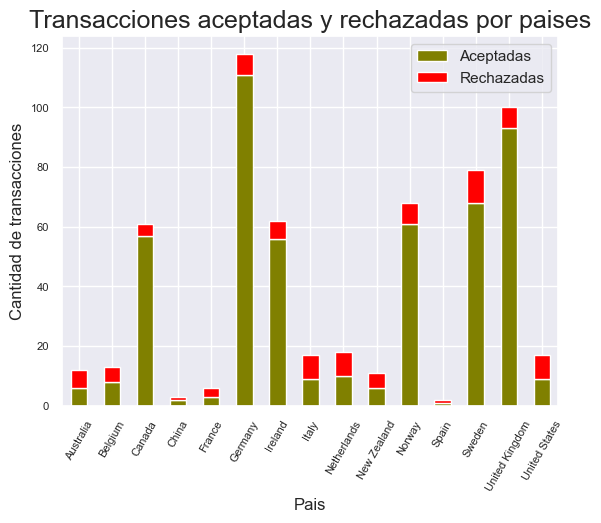

In [14]:
# Unir TODAS las transacciones (tanto aprobadas como rechazadas) con las compañías
df_transactions_companies_todas = df_transactions.merge(df_companies, left_on='business_id', right_on='company_id', how='outer')

# Contar transacciones aceptadas (declined = 0) y rechazadas (declined = 1) por país
data_agrupada = df_transactions_companies_todas.groupby('country')['declined'].value_counts().unstack(fill_value=0)

# Renombrar columnas (suponiendo que False = 0 = Aceptadas y True = 1 = Rechazadas)
data_agrupada.columns = ['Aceptadas', 'Rechazadas']

# Colores personalizados para cada barra
colors = ['olive', 'red']  # Aceptadas = olive, Rechazadas = red

# Graficar
data_agrupada.plot(kind='bar', stacked=True, fontsize=8, color=colors)

plt.title('Transacciones aceptadas y rechazadas por paises', fontsize=18)
plt.xlabel('Pais')
plt.ylabel('Cantidad de transacciones')
plt.xticks(rotation=60)

plt.show()

##### analisis


Nos va muy bien el siguiente grafico para saber en que paises hay un alto numero de operaciones rechazadas en relacion a las operaciones aceptadas. Asi podemos focalizar, de una manera mas concreta, nuestras investigaciones de por que hay tantas operaciones rechazadas.

Podemos ver que en paises como Canada, Alemania, Irlanda la incidencia de las operaciones rechazadas es baja, pero paises como Italia, Holanda o Estados Unidos la incidencia es alta Deberiamos hacer estudios en esos paises importantes donde la incidencia es alta para saber el por que de tantas operaciones declinadas, para asi corregirlo.

### Exercici 6

Tres variables

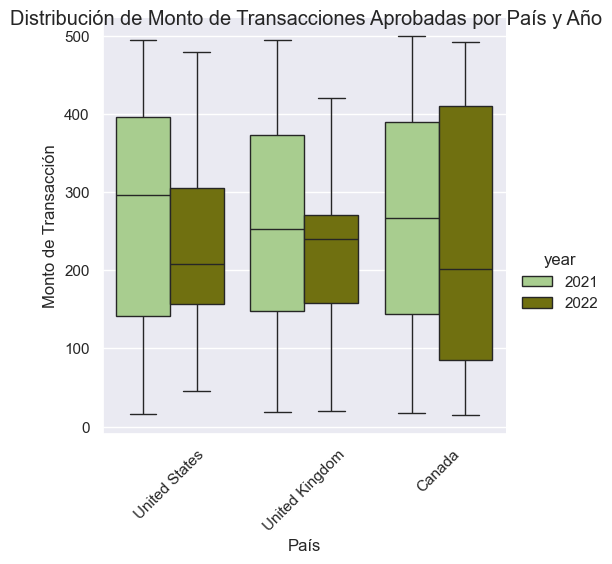

In [15]:
# Filtrar solo las transacciones aprobadas
df_transactions_filtered = df_transactions[df_transactions['declined'] == 0]

# Unir los DataFrames de transacciones filtradas y usuarios
df_transactions_usuarios = pd.merge(df_transactions_filtered, df_users, left_on='user_id', right_on='id')

# Extraer el año de la columna timestamp
df_transactions_usuarios['year'] = df_transactions_usuarios['timestamp'].dt.year

# Definir la paleta de colores personalizada
palette_colors = {2021: "#A6D785", 2022: "#808000"}  # Verde claro y oliva

# Crear el gráfico de cajas con la paleta personalizada
plot = sns.catplot(
    data=df_transactions_usuarios,
    kind='box',
    x='country',
    y='amount',
    hue='year',
    palette=palette_colors
)

# Añadir etiquetas y título
plot.set_axis_labels("País", "Monto de Transacción")  # Etiquetas de los ejes
plot.fig.suptitle("Distribución de Monto de Transacciones Aprobadas por País y Año")  # Título del gráfico

# Rotar las etiquetas del eje X si hay muchos países
plt.xticks(rotation=45)

plt.show()

Hemos realizado un grafico de boxplot viendo el total del monto de usuarios por pais para los años 2021 y 2022, descartando las transacciones declinadas.

##### analisis


En el grafico vemos los siguientes datos:

Estados Unidos:

    . 2021:

. La mediana de ventas está cerca de los 300€.

. Podemos ver que la caja es bastante grande con lo cual nos indica que los valores de amount están bastante dispersos.

. Las ventas mínimas son de unos 20€ y las máximas llegan a prácticamente 500€.

    . 2022:

. La mediana está cerca de los 200€ lo que nos sugiere que las ventan han disminuido en comparación con 2021.

. La caja es más pequeña que en 2021, lo que indica menos variabilidad en las ventas. Los datos están más concentrados.

. Las ventas mínimas son algo mayor que en 2021 siendo de 50€ y ventas máximas un poco inferior a 500€, por tanto menor al 2021 de nuevo.

    Reino Unido:

    . 2021:

. La mediana de ventas está cerca de 250€.

. La variabilidad de los valores es relativamente grande porque vemos que la caja es bastante grande.

. Las ventas mínimas son de 20€ y las máximas de casi 500€.

    . 2022:

. La mediana de ventas está cerca de los 250€ como en el año anterior.

. En este año los valores no están tan dispersos como el año anterior porque la caja es mucho menor.

. Las ventas mínimas son igual que el año anterior mientras que las máximas a disminuido a unos 420€.

    Canadá:

    . 2021:

. La mediana de ventas está alrededor de  los 250€.

. Los valore siguen estando dispersos porque vemos que la caja para este año es grande.

. Las ventas mínimas son de 20€ y las máximas de casi 500€.

    . 2022:

. La mediana bajó a 200€.

. La variabilidad de los valores están más dispersos que el anterior.

. Las ventas mínimas y máximas están igual que el año anterior.

Esta grafica nos aporta buenos datos para saber como evolucionan las ventas por pais y año. Es util para dirigir nuestras campañas de marketing de una manera mas concreta.

### Exercici 7


Graficar un Pairplot

Usaremos el mismo concepto del Ejercicio 2 de la relacion entre el precio y el peso de los productos.

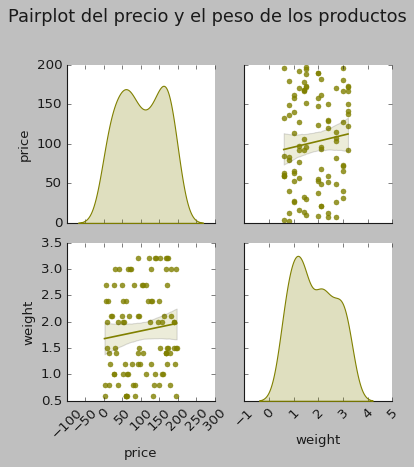

In [16]:
# Estilo clásico de Matplotlib
plt.style.use('classic')

# Crear pairplot con densidad en la diagonal y regresión en los gráficos de dispersión
pairplot = sns.pairplot(df_products, vars=['price', 'weight'], diag_kind='kde', kind='reg', 
                         plot_kws={'color': 'olive'}, diag_kws={'color': 'olive'})

# Título de la figura
pairplot.figure.suptitle('Pairplot del precio y el peso de los productos', fontsize=16, y=1.1)

# Rotar etiquetas del eje X
for ax in pairplot.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=45)  

# Mostrar gráfico
plt.show()

##### analisis


- Distribuciones: 

Por un lado se observa que la distribución del precio tiene 2 picos (bimodal), es decir 2 rangos de precios de los productos que predominan o se repiten con mayor frecuencia. 

En cuanto a la distribución del peso de los productos hay un solo pico (unimodal) alrededor del valor de 1. Es decir, la mayoría de los
productos tienen pesos cercanos a este valor.

- Relación entre precio y peso:

No se evidencia relación fuerte entre las variables precio y peso del producto, como ya se había notado anteriormente en el ejercicio 2.
Puede que la gráfica sugiera una leve correlación positiva, es decir, a mayor peso mayor precio; pero en realidad es muy débil que se puede obviar. En todo caso, quedaría pendiente analizar con mayor profundidad y exactitud a través de otras gráficas o medidas estadísticas, como por ejemplo el coeficiente de correlación de Pearson.

## Nivell 2

### Exercici 1

Correlació de totes les variables numèriques

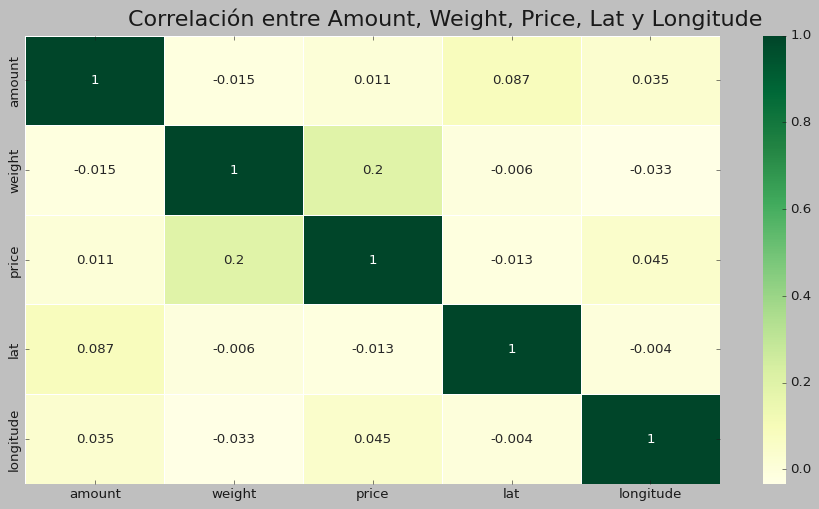

In [17]:
# Fusionar los DataFrames
df_analisis = pd.merge(df_transactions, df_users, left_on="user_id", right_on="id")
df_analisis2 = pd.merge(df_analisis, df_transaction_products, left_on="id_x", right_on="transaction_id")
df_eje7 = pd.merge(df_analisis2, df_products, left_on="product_id", right_on="id")

# Seleccionar las columnas numéricas
df_numeric = df_eje7[["amount", "weight", "price", "lat", "longitude"]]

# Calcular la correlación
Correlation = round(df_numeric.corr(), 3)

# Configurar la figura
plt.figure(figsize=(14, 7))

# Graficar el heatmap con una paleta de colores oliva
sns.heatmap(data=Correlation, annot=True, cmap="YlGn", linewidths=0.5)

# Agregar título
plt.suptitle("Correlación entre Amount, Weight, Price, Lat y Longitude", fontsize=20, y=0.95)

# Mostrar la gráfica
plt.show()

##### analisis

Aquí podemos ver una matriz de correlaciones, la cual es simétrica.

En la diagonal principal se encuentran las correlaciones de cada variable consigo misma, lo que siempre da como resultado 1, indicando una correlación perfecta.

Los valores por encima de la diagonal son idénticos a los de la parte inferior. Esto ocurre porque, por ejemplo, la correlación entre "Amount - Weight" es la misma que la de "Weight - Amount". Esta propiedad se cumple para todos los elementos de la matriz.

En general, las correlaciones son muy bajas, todas por debajo de 0.03, lo que indica que no existe una relación significativa entre los datos, algo que resulta lógico.

Por ejemplo, la longitud y la latitud representan coordenadas espaciales que, en conjunto, determinan una ubicación, pero no tienen una relación causal con variables como el precio o el peso.

La única relación que podría tener cierta lógica es la de "Amount" con el precio. Sin embargo, hay que considerar que "Amount" representa el importe de las transacciones, y cada transacción puede incluir múltiples productos con distintos precios. Aun así, la correlación es extremadamente baja (0.011). Esto se debe a que el "Amount" corresponde al total de la transacción, la cual puede estar compuesta por productos con precios variados.

### Exercici 2

Implementa un jointplot.

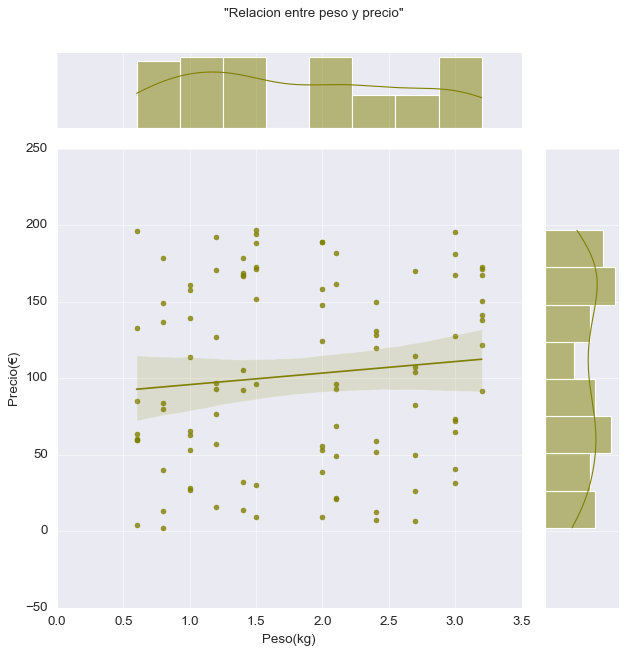

In [18]:
# Establece el estilo de la gráfica con una cuadrícula oscura
sns.set_style('darkgrid')

# Crea un gráfico conjunto (jointplot)
ax2 = sns.jointplot(x="weight", y="price", data=df_products, kind="reg", color="olive", height=8)

# Agrega un título a la figura principal
ax2.fig.suptitle('"Relacion entre peso y precio"', y=1.02)

# Ajusta automáticamente el diseño para evitar solapamientos
ax2.fig.tight_layout()

# Ajusta el espacio superior del título para que no se corte
ax2.fig.subplots_adjust(top=0.95)

# Etiquetas de los ejes
ax2.set_axis_labels("Peso(kg)", "Precio(€)") 

# Muestra la gráfica
plt.show()

##### analisis

Vamos a seguir intentando encontrar una relacion en tre el peso y el precio del producto.

El Joint Plot nos permite combinar tres gráficos en uno.

En la parte superior, sobre el eje opuesto al peso, se encuentra el histograma de la variable Peso. En el lateral derecho, sobre el eje opuesto al precio, se muestra el histograma de la variable Precio. Estos histogramas nos permiten analizar la distribución de ambas variables.

En el centro del gráfico, se representa un scatterplot que muestra la relación entre el precio y el peso.

En este caso, nuevamente se observa que no existe ninguna relación entre estas variables.

Además, se ha añadido una línea de regresión para facilitar la interpretación de los datos. Se puede ver que la línea de regresión es prácticamente plana, lo que confirma la ausencia de una relación significativa entre el peso y el precio.

## Nivell 3

### Exercici 1

Implementa un violinplot combinat amb un altre tipus de gràfic.

<Figure size 1200x640 with 0 Axes>

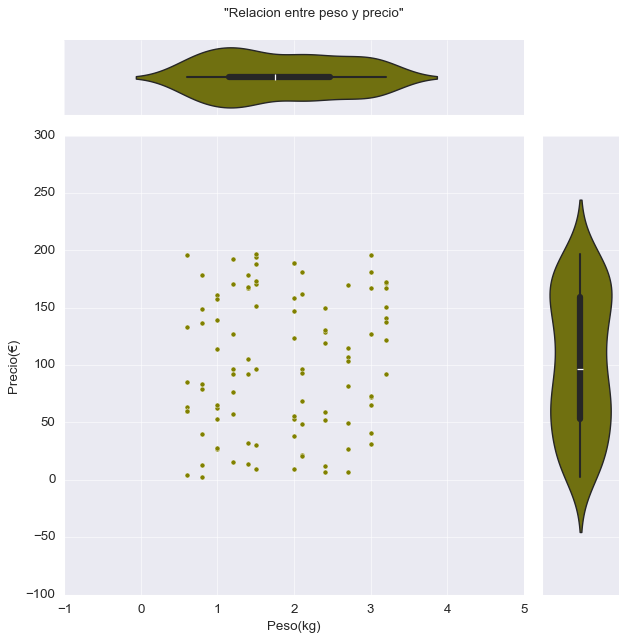

In [19]:
# Crear la figura
plt.figure(figsize=(15, 8))

# Crear el JointGrid
ax3 = sns.JointGrid(data=df_products, x="weight", y="price")
ax3.fig.set_size_inches(8, 8)

# Graficar los puntos (scatterplot) y las violín (violinplot)
ax3.plot(sns.scatterplot, sns.violinplot, color="olive")

# Establecer el título del gráfico
ax3.fig.suptitle('"Relacion entre peso y precio"', y=1)

# Ajustar el diseño de la figura para evitar superposiciones
ax3.fig.tight_layout()

# Ajustar el espacio superior para que el título no se solape
ax3.fig.subplots_adjust(top=0.95)

# Establecer las etiquetas de los ejes X y Y
ax3.set_axis_labels("Peso(kg)", "Precio(€)")

# 9. Mostrar el gráfico final
plt.show()

##### analisis


El gráfico de violín es una excelente herramienta para visualizar variables numéricas, ya que fusiona la información del diagrama de caja con la claridad visual que proporciona el gráfico de densidad.

En este caso, lo he combinado con un jointplot, lo que permite ver, en un solo gráfico, cinco representaciones diferentes: el gráfico de densidad de cada variable, el diagrama de caja de cada una y, finalmente, la relación entre las dos variables.

Respecto al precio, observamos que la media se encuentra cerca del centro de la distribución, aunque un poco más inclinada hacia el primer cuartil. Esto podría hacernos pensar que la distribución es simétrica, pero al analizar el gráfico de densidad, notamos que es bimodal.

En cuanto al peso, si solo miramos el diagrama de caja, parece que la distribución es bastante simétrica, pero el gráfico de densidad revela una acumulación de valores hacia la derecha, lo que indica que es sesgada hacia la izquierda.

Finalmente, en cuanto a la relación entre el precio y el peso, seguimos sin encontrar ninguna correlación significativa entre estas dos variables.

### Exercici 2

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

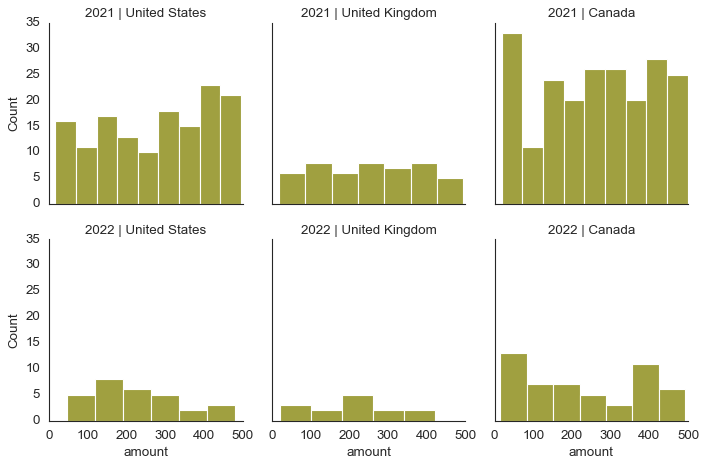

In [20]:
# Extrae el año de la columna 'timestamp' y crea una nueva columna 'Year'
df_transactions_usuarios['Year'] = df_transactions_usuarios['timestamp'].dt.year

# Configura el estilo del gráfico
sns.set_style('white')

# Crea el FacetGrid usando 'country' para las columnas y 'Year' para las filas
g = sns.FacetGrid(df_transactions_usuarios, col='country', row='Year')

# Mapea el gráfico de histograma a cada subgráfico con color 'olive'
g.map(sns.histplot, 'amount', color='olive', hue=None)

# Establece los títulos para las filas y columnas
g.set_titles(col_template='{col_name}', row_template='{row_name}')

# Muestra el gráfico
plt.show()

##### analisis

En 2021, Canadá muestra un claro aumento en la primera barra del histograma, siendo el único país que presenta una concentración notable de transacciones de montos bajos. En contraste, el Reino Unido mantiene una tendencia bastante constante a lo largo de todas las barras, mientras que en Estados Unidos, la mayoría de las transacciones se agrupan en los valores más altos.

Al analizar los datos de 2022, Canadá sigue mostrando una tendencia similar, con un pico prominente en la primera barra. En la figura 1, que presenta el histograma de los montos de las transacciones sin segmentar por país, se observa claramente que la mayor concentración se encuentra en la primera barra, coincidiendo con Canadá, lo que resalta la fuerte influencia de este país en los resultados globales.

Por otro lado, en 2022, tanto Estados Unidos como el Reino Unido tienen un número bajo de transacciones en cada rango de monto, por lo que he decidido no profundizar en el análisis de estos países durante ese año.